## **1. BUSINESS UNDERSTANDING**

**Goal:** Using survey data to understand and predict developer salaries.

**Why it matters:** This can help recruiters make fair salary offers and help developers negotiate better based on their profile.

## **2.** **DATA** **LOADING**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("survey_results_public.csv")

# Show top rows
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## **3. EXPLORATORY DATA ANALYSIS (EDA)**

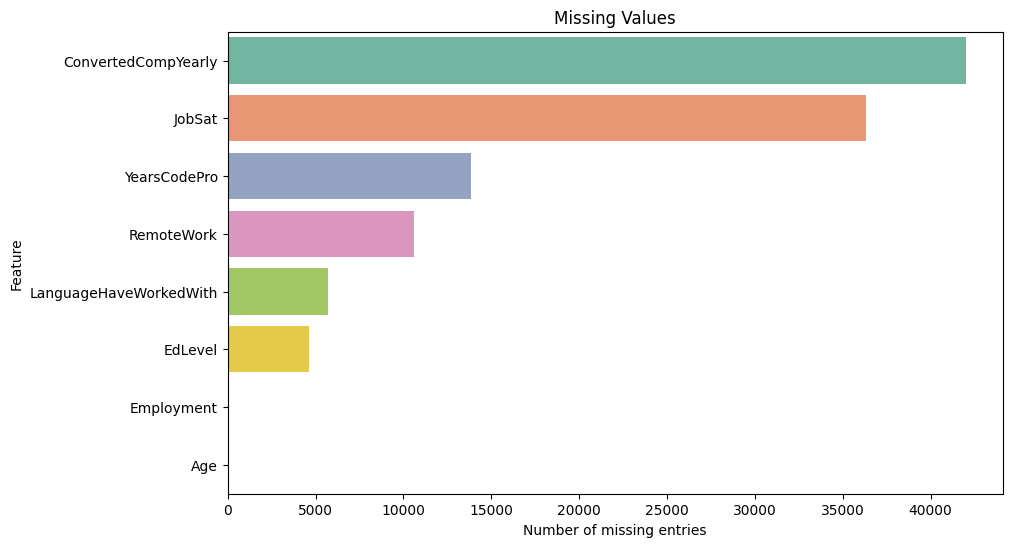

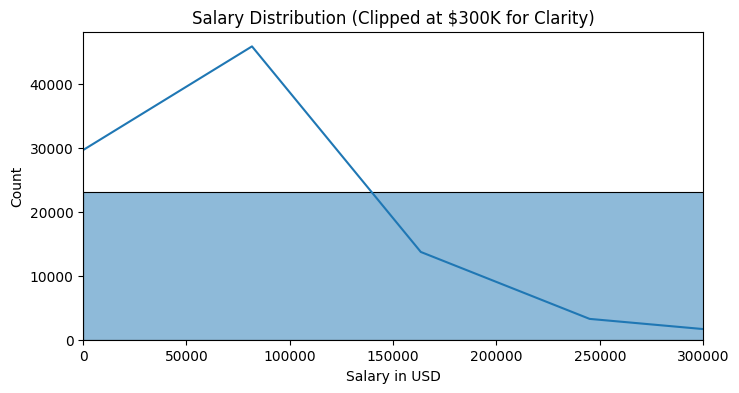

,Age,EdLevel,Employment,RemoteWork,ConvertedCompYearly,JobSat,YearsCodePro,LanguageHaveWorkedWith
count,65437,60784,65437,54806,2.343500e+04,29126.000000,51610,59745
unique,8,8,110,3,NaN,NaN,52,23864
top,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Hybrid (some remote, some in-person)",NaN,NaN,2,HTML/CSS;JavaScript;TypeScript
freq,23911,24942,39041,23015,NaN,NaN,4168,1002
mean,NaN,NaN,NaN,NaN,8.615529e+04,6.935041,NaN,NaN
std,NaN,NaN,NaN,NaN,1.867570e+05,2.088259,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.271200e+04,6.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.500000e+04,7.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.079715e+05,8.000000,NaN,NaN


In [ ]:
eda_columns = [
    'Age', 'EdLevel', 'Employment', 'RemoteWork',
    'ConvertedCompYearly', 'JobSat', 'YearsCodePro', 'LanguageHaveWorkedWith'
]

eda_df = df[eda_columns].copy()

# Missing values
missing = eda_df.isnull().sum().sort_values(ascending=False).reset_index()
missing.columns = ['Feature', 'MissingCount']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=missing,
    x='MissingCount',
    y='Feature',
    hue='Feature',
    palette=sns.color_palette("Set2", n_colors=len(missing)),
    legend=False
)
plt.title("Missing Values")
plt.xlabel("Number of missing entries")
plt.ylabel("Feature")
plt.show()

# Salary distribution
plt.figure(figsize=(8, 4))
sns.histplot(eda_df['ConvertedCompYearly'], bins=50, kde=True)
plt.xlim(0, 300000)
plt.title("Salary Distribution (Clipped at $300K for Clarity)")
plt.xlabel("Salary in USD")
plt.show()

# Summary statistics
eda_df.describe(include='all')


**Summary of Findings:**

* Salary (ConvertedCompYearly) is right-skewed → typical of income data.

* Many missing values in key features like JobSat, YearsCodePro, and LanguageHaveWorkedWith.

* YearsCodePro is not in numeric format (contains "Less than 1 year", etc.).

## **4. DATA CLEANING AND PREPARATION**
After conducting EDA, we identified missing values, inconsistent formats, and non-numeric data in key columns. Data cleaning is essential to ensure the dataset is complete, consistent, and suitable for modeling. It helps prevent errors, improves model accuracy, and ensures that the machine learning algorithms can correctly interpret and learn from the data.



In [ ]:
# Drop rows missing key values
clean_df = eda_df.dropna(subset=['ConvertedCompYearly', 'YearsCodePro', 'EdLevel', 'Employment']).copy()

# Convert YearsCodePro to numeric safely
def convert_years_code(val):
    if val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    try:
        return float(val)
    except:
        return None

clean_df.loc[:, 'YearsCodePro'] = clean_df['YearsCodePro'].apply(convert_years_code)
clean_df = clean_df.dropna(subset=['YearsCodePro'])

# Encode categorical variables safely
from sklearn.preprocessing import LabelEncoder

for col in ['EdLevel', 'Employment', 'RemoteWork', 'JobSat']:
    clean_df.loc[:, col] = LabelEncoder().fit_transform(clean_df[col].astype(str))

# Features and target
features = ['EdLevel', 'Employment', 'RemoteWork', 'YearsCodePro']
target = 'ConvertedCompYearly'

X = clean_df[features]
y = clean_df[target]



**Summary of Cleaning:**

* Removed rows with missing salary or core features.

* Converted coding experience to numeric.

* Encoded categorical variables for modeling.

## **5. MODEL TRAINING AND EVALUATION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", round(mae, 2))
print("R² Score:", round(r2, 4))


Mean Absolute Error: 50534.97
R² Score: 0.063


**Interpretation:**

* MAE ~ $50K: On average, the model is off by this much.

* R² ~ 0.06: The model explains ~6% of salary variation. Not strong — likely due to high salary variability and missing location/role-level features.

The model is basic but works as a proof-of-concept.
Further feature engineering (e.g., country, tech stack, industry) would improve accuracy.

## **6. Real-World Scenario and Prediction**

In [ ]:
# Hypothetical developer input
sample = pd.DataFrame({
    'EdLevel': [2],         # Example: Master's degree
    'Employment': [0],      # Example: Full-time
    'RemoteWork': [1],      # Example: Hybrid
    'YearsCodePro': [3.0]   # 3 years of coding experience
})

predicted_salary = model.predict(sample)
print("Predicted Salary (USD):", predicted_salary[0])


Predicted Salary (USD): 68248.70698900489


**Interpretation:**

For a developer with a Master’s degree, 3 years of experience, and hybrid work, the model predicts a starting salary of ~$68000.
This provides a rough estimation to aid career planning or job negotiations.